# Model K-means

This Jupyter notebook is used to:

1. Run PCA.
2. Run K-means.
3. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_brute_force/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.40940,0.05894,0.02980,0.75410,0.00139,0.00030,0.00016,0.00684,0.00012,...,77291,44,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:33:32.199062Z
1,1.00000,0.69959,0.05896,0.02978,0.75419,0.00253,0.00048,0.00018,0.00684,0.00006,...,36392,29,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:33:32.258791Z
2,1.00000,0.76739,0.09980,0.00020,0.75566,0.00365,0.00047,0.00008,0.00684,0.00001,...,3696,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:35:59.291704Z
3,1.00000,0.06320,0.10769,0.00002,0.00183,0.00008,0.00001,0.00001,0.00186,0.00000,...,76,1,udp,ntp,SF,orig_well_known,resp_123,No,No,2017-07-06T12:36:27.694263Z
4,1.00000,0.85747,0.08774,0.00000,0.75071,0.00000,0.00000,0.00000,0.00208,0.00000,...,180,2,udp,dns,SHR,orig_reg_or_dyn,resp_well_known,No,No,2017-07-06T12:35:15.878393Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.85747,0.59469,0.00004,0.83464,0.00014,0.00002,0.00001,0.00078,0.00000,...,252,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T13:05:40.810838Z
1,1.00000,0.85747,0.18159,0.00003,0.37047,0.00009,0.00002,0.00001,0.00078,0.00000,...,370,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-06T12:40:53.714858Z
2,1.00000,0.69959,0.05860,0.03074,0.75399,0.00134,0.00043,0.00023,0.00684,0.00011,...,70175,43,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:33:30.954978Z
3,1.00000,0.12260,0.50950,0.02682,0.75915,0.00159,0.00029,0.00011,0.00684,0.00001,...,4459,12,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-06T13:00:34.135445Z
4,1.00000,0.45579,0.01934,0.08600,0.59781,0.00118,0.00032,0.00015,0.00684,0.00001,...,6451,21,tcp,ssl,RSTR,orig_reg_or_dyn,resp_443,No,No,2017-07-06T12:31:09.634192Z


In [4]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 40741 rows and 296 columns


In [5]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [6]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [7]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [9]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                         CONN_APP_STATS + 
                         OHE_ORIG_P_CAT_COLS + 
                         OHE_RESP_P_CAT_COLS + 
                         OHE_PROTO_CAT_COLS + 
                         OHE_SERVICE_CAT_COLS + 
                         OHE_CONN_STATE_CAT_COLS + 
                         
                         # originator neighbourhood
                         ORIG_ORIG_NUMERICAL_COLS + 
                         ORIG_ORIG_PORTS_COLS + 
                         ORIG_ORIG_APP_STATS_COLS + 
                         ['orig_orig_similar_conns_count'] + 
                         # originator categorical neighbourhood 
                         ORIG_ORIG_OHE_CAT_COLS + 
                         
                         # originator neighbourhood 2 
                         ORIG_RESP_NUMERICAL_COLS + 
                         ORIG_RESP_PORTS_COLS + 
                         ORIG_RESP_APP_STATS_COLS + 
                         ['orig_resp_similar_conns_count'] + 
                         # originator categorical neighbourhood 2
                         ORIG_RESP_OHE_CAT_COLS + 
                         
                         # responder neighbourhood
                         RESP_ORIG_NUMERICAL_COLS + 
                         RESP_ORIG_PORTS_COLS + 
                         RESP_ORIG_APP_STATS_COLS + 
                         ['resp_orig_similar_conns_count'] + 
                         # responder categorical neighbourhood 
                         RESP_ORIG_OHE_CAT_COLS + 
                         
                         # responder neighbourhood 2
                         RESP_RESP_NUMERICAL_COLS + 
                         RESP_RESP_PORTS_COLS + 
                         RESP_RESP_APP_STATS_COLS + 
                         ['resp_resp_similar_conns_count'] + 
                         # responder categorical neighbourhood 2
                         RESP_RESP_OHE_CAT_COLS, axis=1)

In [10]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_p_cat_orig_reg_or_dyn,orig_p_cat_orig_well_known,resp_p_cat_resp_123,resp_p_cat_resp_21,resp_p_cat_resp_22,resp_p_cat_resp_443,resp_p_cat_resp_53,resp_p_cat_resp_80,resp_p_cat_resp_dyn,resp_p_cat_resp_reg,resp_p_cat_resp_well_known,connection.proto_icmp,connection.proto_tcp,connection.proto_udp,connection.service_dce_rpc,connection.service_dns,connection.service_ftp,connection.service_ftp-data,"connection.service_gssapi,dce_rpc,smb","connection.service_gssapi,ntlm,smb","connection.service_gssapi,smb,krb",connection.service_http,connection.service_krb,connection.service_krb_tcp,connection.service_none,connection.service_ntp,connection.service_ssh,connection.service_ssl,connection.conn_state_OTH,connection.conn_state_REJ,connection.conn_state_RSTO,connection.conn_state_RSTR,connection.conn_state_RSTRH,connection.conn_state_S0,connection.conn_state_S1,connection.conn_state_S2,connection.conn_state_S3,connection.conn_state_SF,connection.conn_state_SH,connection.conn_state_SHR,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_connection.protocol_mode_icmp,orig_orig_connection.protocol_mode_tcp,orig_orig_connection.protocol_mode_udp,orig_orig_connection.service_mode_dns,orig_orig_connection.service_mode_ftp-data,orig_orig_connection.service_mode_http,orig_orig_connection.service_mode_none,orig_orig_connection.service_mode_ntp,orig_orig_connection.service_mode_ssl,orig_orig_connection.conn_state_mode_OTH,orig_orig_connection.conn_state_mode_SF,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_connection.protocol_mode_-,orig_resp_connection.protocol_mode_icmp,orig_resp_connection.protocol_mode_tcp,orig_resp_connection.protocol_mode_udp,orig_resp_connection.service_mode_-,orig_resp_connection.service_mode_dns,orig_resp_connection.service_mode_ftp,orig_resp_connection.service_mode_none,orig_resp_connection.service_mode_ssh,orig_resp_connection.conn_state_mode_-,orig_resp_connection.conn_state_mode_OTH,orig_resp_connection.conn_state_mode_S0,orig_resp_connection.conn_state_mode_SF,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,re

In [11]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'dns_count',
       'ssh_count',
       ...
       'resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mode_SF',
       'resp_resp_connection.conn_state_mode_SH',
       'resp_resp_connection.conn_state_mode_SHR'],
      dtype='object', length=207)

## 1. Dimension Reduction (PCA)

In [12]:
from sklearn.decomposition import PCA

n_components = len(df.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [13]:
pca_X = pca.fit_transform(df)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 207 principal components: 1.0


In [14]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999967]
Variance Captured by First  10 Principal Components: [0.9259073]
Variance Captured by First   7 Principal Components: [0.90158982]
Variance Captured by First   5 Principal Components: [0.87160514]
Variance Captured by First   2 Principal Components: [0.75262729]
Variance Captured by the First Principal Component:  [0.63109073]


In [15]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.37541193
Variance of connection.duration                       : 0.25567880
Variance of connection.orig_p                         : 0.06725763
Variance of connection.orig_bytes                     : 0.05427892
Variance of connection.orig_pkts                      : 0.04586969
Variance of connection.resp_p                         : 0.04122915
Variance of connection.resp_bytes                     : 0.03187903
Variance of connection.resp_pkts                      : 0.01714301
Variance of dns_count                                 : 0.01284166
Variance of ssh_count                                 : 0.00973542
Variance of http_count                                : 0.00809607
Variance of ssl_count                                 : 0.00648599
Variance of files_count                               : 0.00596210
Variance of orig_p_cat_orig_reg_or_dyn                : 0.00543643
Variance of orig_p_cat_orig_well_known                : 0.0043

## 2. K-means

In [16]:
from datetime import datetime
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.k_means.html#sklearn.cluster.k_means
# https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
from sklearn.cluster import KMeans

# Choose optimal K using Elbow method
score = []
inertia = []
print_info = []
computed_clusters = []
computed_clusters_fitted = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
for cluster in range(1, 25):
    try:
        km = KMeans(
            n_clusters=cluster, init='random',
            n_init=10, max_iter=300, 
            tol=1e-04, random_state=0
        )
        km_fitted = km.fit(pca_X)
        y_km = km.fit_predict(pca_X)
        computed_clusters.append(km)
        computed_clusters_fitted.append(km_fitted)
        score.append(km.score(pca_X))
        inertia.append(km.inertia_)
        print_str = 'Cluster initiation: {:2} ({})'.format(cluster, datetime.now().strftime("%H:%M:%S"))
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:20:54.
Cluster initiation:  1 (00:20:56)
Cluster initiation:  2 (00:20:59)
Cluster initiation:  3 (00:21:01)
Cluster initiation:  4 (00:21:04)
Cluster initiation:  5 (00:21:08)
Cluster initiation:  6 (00:21:12)
Cluster initiation:  7 (00:21:16)
Cluster initiation:  8 (00:21:20)
Cluster initiation:  9 (00:21:25)
Cluster initiation: 10 (00:21:31)
Cluster initiation: 11 (00:21:38)
Cluster initiation: 12 (00:21:44)
Cluster initiation: 13 (00:21:52)
Cluster initiation: 14 (00:21:58)
Cluster initiation: 15 (00:22:04)
Cluster initiation: 16 (00:22:10)
Cluster initiation: 17 (00:22:17)
Cluster initiation: 18 (00:22:24)
Cluster initiation: 19 (00:22:32)
Cluster initiation: 20 (00:22:40)
Cluster initiation: 21 (00:22:47)
Cluster initiation: 22 (00:22:54)
Cluster initiation: 23 (00:23:01)
Cluster initiation: 24 (00:23:09)
Done at 00:23:09.


In [17]:
score

[-414760.5398395053,
 -273853.0348385239,
 -176598.2471782128,
 -153539.27961435978,
 -131367.8108347284,
 -114803.82889963344,
 -98995.76580159228,
 -91384.14960007409,
 -88482.70917564335,
 -85564.2052227255,
 -79627.77276460685,
 -75719.92647965139,
 -71552.08681823747,
 -70533.99658415707,
 -67428.98944656693,
 -66745.13729443327,
 -65349.11122107779,
 -62429.90900664609,
 -60304.02483219678,
 -59641.57023284167,
 -58709.16301664822,
 -57220.151738381246,
 -56437.150773844005,
 -53481.822723926314]

In [18]:
inertia

[414760.5398395053,
 273853.03483852395,
 176598.2471782128,
 153539.27961435978,
 131367.8108347284,
 114803.82889963344,
 98995.76580159228,
 91384.14960007409,
 88482.70917564337,
 85564.2052227255,
 79627.77276460685,
 75719.92647965139,
 71552.08681823747,
 70533.99658415707,
 67428.98944656693,
 66745.13729443327,
 65349.11122107779,
 62429.90900664609,
 60304.02483219678,
 59641.57023284167,
 58709.163016648214,
 57220.151738381246,
 56437.150773844005,
 53481.822723926314]

In [19]:
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': inertia})

In [20]:
df_cost

,Cluster,Cost
0,1,414760.53984
1,2,273853.03484
2,3,176598.24718
3,4,153539.27961
4,5,131367.81083
5,6,114803.82890
6,7,98995.76580
7,8,91384.14960
8,9,88482.70918
9,10,85564.20522


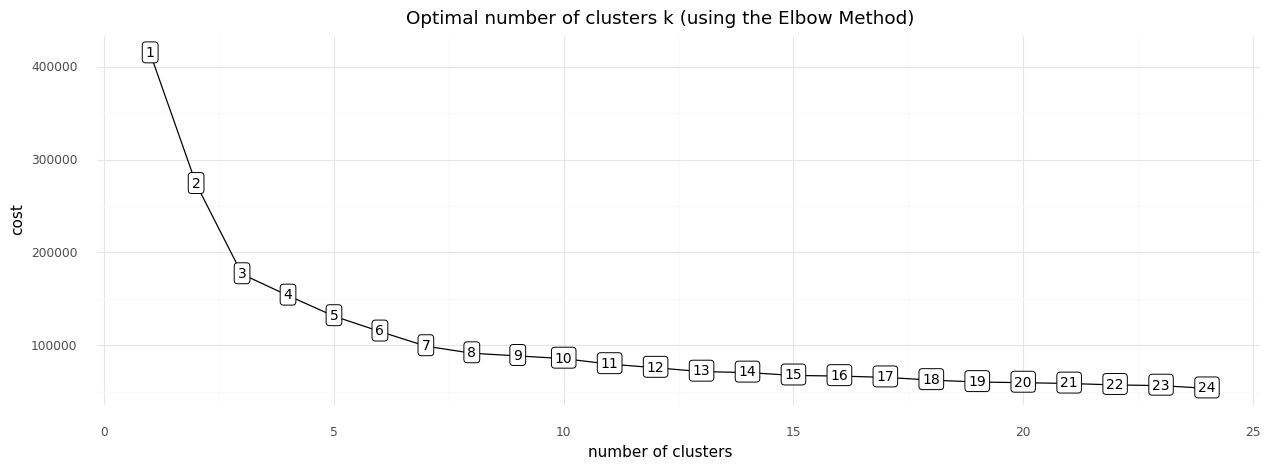

<ggplot: (8759919920050)>

In [21]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (15, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [75]:
# Fit the cluster
OPTIMAL_K = 5

kmeans = computed_clusters[OPTIMAL_K]

In [76]:
# Cluster centorid
kmeans.cluster_centers_

array([[ 1.06523091e+00, -1.97998192e+00,  2.38955149e+00, ...,
         4.59774732e-18,  3.65375524e-20,  2.23145224e-19],
       [-2.03178380e+00, -8.35371927e-01, -1.44131898e-01, ...,
         4.53317658e-18,  2.01698201e-20,  1.69511663e-19],
       [ 2.71953055e+00, -6.36159517e-01, -1.05606210e+00, ...,
         4.56027467e-18,  5.52567641e-21,  1.74316407e-19],
       [ 2.28193774e+00, -5.49031248e-01,  1.03278777e+00, ...,
         4.43698564e-18,  3.19138381e-20,  1.74458343e-19],
       [-2.17858870e-01,  2.84793271e+00,  8.29528137e-02, ...,
         4.49729337e-18, -2.02303476e-20,  2.75143164e-19],
       [ 1.09635127e+00,  6.28552747e-01,  4.95340766e-01, ...,
         4.63169078e-18,  1.18489949e-20, -1.19640920e-19]])

In [77]:
# Check the iteration of the clusters created
kmeans.n_iter_

8

In [78]:
# Check the cost of the clusters created
kmeans.inertia_

114803.82889963344

In [79]:
# Add cluster labels to original dataframe
pca_X['cluster'] = kmeans.labels_
pca_X['cluster_cat'] = pca_X['cluster']

# (groupby works only on category type)
pca_X['cluster_cat'] = pca_X['cluster_cat'].astype('category')

In [80]:
pca_X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,cluster,cluster_cat
0,-1.82229,-1.01149,-0.01545,-0.67708,-0.26244,0.08411,-0.04364,0.22306,-0.17084,-0.10190,0.10350,0.05760,-0.00624,-0.17142,0.17694,-0.23074,0.04423,0.25797,-0.35633,-0.03477,-0.06306,0.02749,0.02049,-0.13652,-0.16040,0.12779,0.04222,0.11323,-0.26307,0.07311,0.16614,-0.01727,0.02083,-0.12238,-0.03930,0.20271,0.08601,-0.13915,-0.01373,0.03312,0.04799,-0.00914,0.00737,-0.05297,0.00796,-0.00729,0.06206,-0.01682,-0.02039,-0.04117,0.03688,0.00474,0.02196,0.01054,0.00125,0.00323,-0.00028,0.01381,-0.00672,0.01497,0.01179,0.01225,0.00246,0.00150,0.00180,-0.00270,-0.01890,0.01112,0.00574,0.00332,0.00458,-0.00282,0.00597,0.00296,-0.00215,0.00686,0.00634,-0.00601,0.00429,-0.00332,0.01124,0.00402,0.00554,-0.00433,0.00121,-0.00258,-0.01212,0.00145,0.00106,-0.00511,0.00726,-0.00829,-0.01238,0.00982,0.00182,0.00157,-0.00478,-0.00322,-0.00544,0.00685,0.00139,-0.00261,0.00586,0.00021,0.00023,-0.00622,0.00287,-0.00736,-0.00118,0.00274,0.00084,0.00227,0.00432,-0.00128,0.00086,-0.00043,0.00306,0.00011,0.00196,-0.00261,-0.00182,-0.00231,0.00040,0.00001,0.00297,0.00169,-0.00273,-0.00159,-0.00149,0.00027,0.00574,0.00771,0.00037,0.00035,-0.00430,-0.00017,0.00396,-0.00203,-0.00201,0.00018,-0.00179,0.00047,0.00023,-0.00259,0.00010,0.00194,0.00009,-0.00266,-0.00007,-0.00000,-0.00026,-0.00114,0.00003,-0.00119,0.00009,0.00023,-0.00000,-0.00003,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,1,1
1,-2.33020,-1.18780,-0.36608,0.39731,0.01568,0.11845,0.16915,0.53155,-0.12868,0.03317,0.20195,-0.70358,-0.25337,0.36796,0.28343,-0.01397,-0.13702,-0.07142,-0.03335,0.06481,-0.09576,0.03045,-0.05724,0.01966,-0.07364,0.03612,0.02451,0.03167,-0.15791,0.01885,0.10575,-0.01702,-0.14334,-0.05125,0.12361,-0.17294,-0.00454,-0.03320,0.03514,-0.00332,-0.01403,0.02272,-0.14672,0.06307,-0.14523,-0.00177,0.15247,-0.02685,-0.03082,-0.00713,0.01539,-0.02013,-0.02925,-0.01140,0.06534,0.02452,0.00929,0.00475,-0.00436,-0.00445,-0.00231,-0.04738,-0.01691,-0.00323,-0.01364,0.02964,-0.02664,-0.00044,-0.01300,-0.01968,0.02845,-0.00556,0.02400,0.00310,0.01082,0.02192,0.00239,-0.00773,-0.01359,-0.00399,0.01275,0.02451,0.00759,0.00116,-0.00250,-0.00161,0.01586,-0.00737,0.01237,0.02791,-0.00405,-0.03518,0.00313,-0.00739,0.00048,-0.00241,-0.00011,-0.00143,0.00487,-0.00251,-0.00195,0.00184,-0.00777,-0.00061,0.00842,0.00200,-0.00741,0.00473,-0.00461,0.01124,-0.00259,-0.00597,-0.00558,-0.00485,0.00281,0.00044,-0.00156,0.00159,0.00571,-0.00551,-0.00022,-0.00884,0.00009,-0.00024,-0.00760,0.00100,0.00005,-0.00033,-0.00100,0.00008,0.00131,-0.00013,0.00066,0.00007,-0.00259,0.00001,0.00362,0.00074,-0.00201,-0.00034,0.00260,-0.00050,0.00003,0.00419,-0.00032,-0.00086,-0.00053,0.00005,0.00006,-0.00005,0.00004,-0.00021,-0.00011,-0.00057,0.00001,0.00014,0.00013,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.0

In [81]:
pca_X.columns

Index([            0,             1,             2,             3,
                   4,             5,             6,             7,
                   8,             9,
       ...
                 199,           200,           201,           202,
                 203,           204,           205,           206,
           'cluster', 'cluster_cat'],
      dtype='object', length=209)

In [82]:
pca_X['cluster'].value_counts()

1    16537
4     8320
2     7746
3     4622
0     1773
5     1743
Name: cluster, dtype: int64

## 3. Results

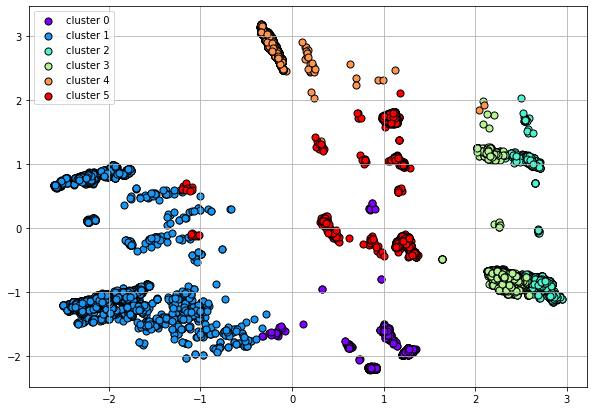

In [83]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

plt.rcParams["figure.figsize"] = (10,7)
colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kmeans.labels_ == i, 0], pca_X_array[kmeans.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [84]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kmeans.labels_ == i, 0], 
                   pca_X_array[kmeans.labels_ == i, 1], 
                   pca_X_array[kmeans.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

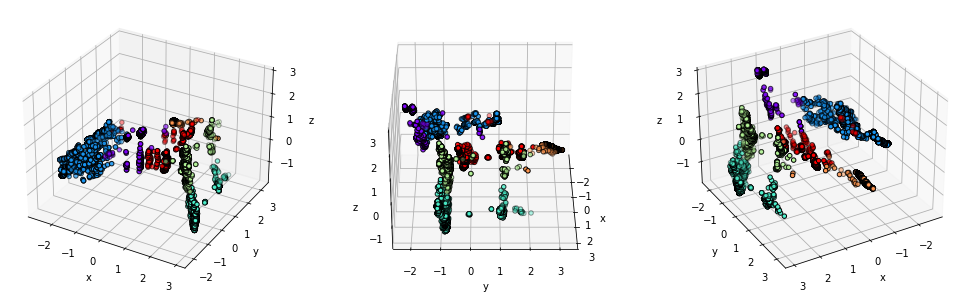

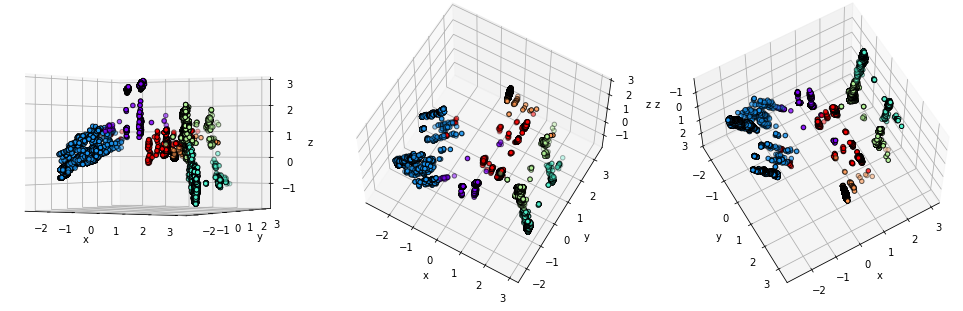

In [85]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [86]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [87]:
# Cluster interpretation

# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,cluster,cluster_cat,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-1.82229,-1.01149,-0.01545,-0.67708,-0.26244,0.08411,-0.04364,0.22306,-0.17084,-0.10190,0.10350,0.05760,-0.00624,-0.17142,0.17694,-0.23074,0.04423,0.25797,-0.35633,-0.03477,-0.06306,0.02749,0.02049,-0.13652,-0.16040,0.12779,0.04222,0.11323,-0.26307,0.07311,0.16614,-0.01727,0.02083,-0.12238,-0.03930,0.20271,0.08601,-0.13915,-0.01373,0.03312,0.04799,-0.00914,0.00737,-0.05297,0.00796,-0.00729,0.06206,-0.01682,-0.02039,-0.04117,0.03688,0.00474,0.02196,0.01054,0.00125,0.00323,-0.00028,0.01381,-0.00672,0.01497,0.01179,0.01225,0.00246,0.00150,0.00180,-0.00270,-0.01890,0.01112,0.00574,0.00332,0.00458,-0.00282,0.00597,0.00296,-0.00215,0.00686,0.00634,-0.00601,0.00429,-0.00332,0.01124,0.00402,0.00554,-0.00433,0.00121,-0.00258,-0.01212,0.00145,0.00106,-0.00511,0.00726,-0.00829,-0.01238,0.00982,0.00182,0.00157,-0.00478,-0.00322,-0.00544,0.00685,0.00139,-0.00261,0.00586,0.00021,0.00023,-0.00622,0.00287,-0.00736,-0.00118,0.00274,0.00084,0.00227,0.00432,-0.00128,0.00086,-0.00043,0.00306,0.00011,0.00196,-0.00261,-0.00182,-0.00231,0.00040,0.00001,0.00297,0.00169,-0.00273,-0.00159,-0.00149,0.00027,0.00574,0.00771,0.00037,0.00035,-0.00430,-0.00017,0.00396,-0.00203,-0.00201,0.00018,-0.00179,0.00047,0.00023,-0.00259,0.00010,0.00194,0.00009,-0.00266,-0.00007,-0.00000,-0.00026,-0.00114,0.00003,-0.00119,0.00009,0.00023,-0.00000,-0.00003,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,1,1,CrPvcw3T8whS1D2iXe,1.00000,192.168.10.12,0.85747,192.168.10.3,2017-07-06T13:05:40.810838Z,0.59469,0.05129,0.00004,udp,dns,SF,0.83464,54698,orig_reg_or_dyn,0.00014,90,0.00001,2,0.00078,53,resp_53,0.00000,196,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1,-2.33020,-1.18780,-0.36608,0.39731,0.01568,0.11845,0.16915,0.53155,-0.12868,0.03317,0.20195,-0.70358,-0.25337,0.36796,0.28343,-0.01397,-0.13702,-0.07142,-0.03335,0.06481,-0.09576,0.03045,-0.05724,0.01966,-0.07364,0.03612,0.02451,0.03167,-0.15791,0.01885,0.10575,-0.01702,-0.14334,-0.05125,0.12361,-0.17294,-0.00454,-0.03320,0.03514,-0.00332,-0.01403,0.02272,-0.14672,0.06307,-0.14523,-0.00177,0.15247,-0.02685,-0.03082,-0.00713,0.01539,-0.02013,-0.02925,-0.01140,0.06534,0.02452,0.00929,0.00475,-0.00436,-0.00445,-0.00231,-0.04738,-0.01691,-0.00323,-0.01364,0.02964,-0.02664,-0.00044,-0.01300,-0.01968,0.02845,-0.00556,0.02400,0.00310,0.01082,0.02192,0.00239,-0.00773,-0.01359,-0.00399,0.01275,0.02451,0.00759,0.00116,-0.00250,-0.00161,0.01586,-0.00737,0.01237,0.02791,-0.00405,-0.03518,0.

In [89]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [90]:
print('Time:')
print_df_func(result, 'timestamp', 'min')
print_df_func(result, 'timestamp', 'max')

Time:
timestamp min = 2017-07-06T12:30:00.011574Z
timestamp max = 2017-07-06T13:29:59.873913Z



In [91]:
plt.rcParams["figure.figsize"] = (10,7)

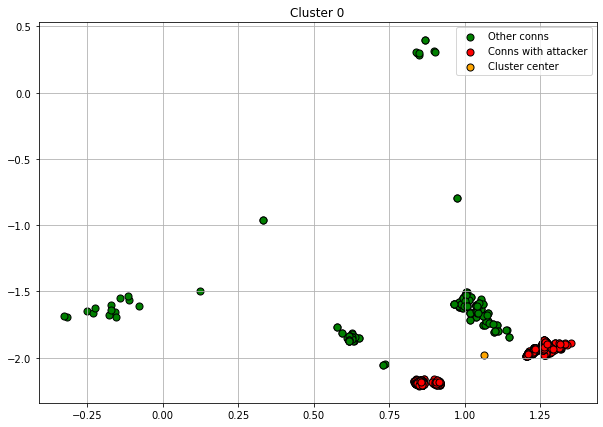

Total num of conns: 1773

Attacker conns ratio:
Yes    1557
No      216
Name: attacker_label, dtype: int64

IPs:
172.16.0.1        1557
192.168.10.15       30
192.168.10.17       30
192.168.10.8        26
192.168.10.16       24
192.168.10.5        22
192.168.10.14       20
192.168.10.12       16
192.168.10.25       15
192.168.10.9        14
192.168.10.51        9
192.168.10.19        8
109.201.130.58       1
109.201.130.57       1
Name: originated_ip, dtype: int64

192.168.10.50    1756
192.168.10.19      15
192.168.10.12       2
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.058094Z
timestamp max = 2017-07-06T13:29:58.713386Z

Cluster 0 NOK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
17287,CTgxvJ3Xuz3QHnurUb,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:43:53.489573Z,0.23153,5.86427,0.00431,tcp,none,SF,0.56317,36908,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
34406,CJlzbNfxczdbgbZC1,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:42:23.494677Z,0.20653,5.83229,0.00428,tcp,none,SF,0.54205,35524,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
16686,CvagqP1ny3hXxILuk3,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T13:27:03.786814Z,0.95109,5.00294,0.00367,tcp,none,SF,0.90301,59178,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
37726,CKCs202uDmSf5hFnUc,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:59:22.064927Z,0.48948,5.56792,0.00409,tcp,none,SF,0.78184,51238,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
7964,CHdNz82HkFIrYshxn4,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:34:43.205819Z,0.07867,5.97352,0.00439,tcp,none,SF,0.86471,56668,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
32412,CfIcWuU5G8Wht0pC5,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:43:57.262924Z,0.23258,5.09236,0.00374,tcp,none,SF,0.56405,36966,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
12959,Cte7JQ3HjnNibfgi9j,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:46:26.71118Z,0.27409,5.68663,0.00417,tcp,none,SF,0.59924,39272,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
2144,CiSkUm29TFqN0srumg,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:46:44.572856Z,0.27906,35.20773,0.02585,tcp,http,SF,0.60339,39544,orig_reg_or_dyn,0.07038,43906,0.00131,204,0.00120,80,resp_80,0.00012,72181,0.00059,105,0.00000,0.00000,1.00000,0.00000,0.75248,Yes,Yes
10365,CdpJFe2bhStLPnIoMf,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T12:36:21.1771Z,0.10588,5.03313,0.00369,tcp,none,SF,0.88756,58166,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
33651,CQr1LD2luGhWiMsrB3,0.75149,172.16.0.1,0.85747,192.168.10.50,2017-07-06T13:18:30.266521Z,0.80844,5.37612,0.00395,tcp,none,SF,0.81969,53718,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 0 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
10529,Cq5NTQ3fZoZ5gfl7Gg,1.00000,192.168.10.25,0.85747,192.168.10.19,2017-07-06T12:53:16.146926Z,0.38783,0.05479,0.00004,tcp,"gssapi,dce_rpc,smb",SF,0.75656,49581,orig_reg_or_dyn,0.00199,1244,0.00033,52,0.00211,139,resp_well_known,0.00000,1588,0.00016,28,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
37959,CWlEKEiJAKYjlfByi,1.00000,192.168.10.5,0.85747,192.168.10.50,2017-07-06T13:25:52.500338Z,0.93128,1.29472,0.00095,tcp,ssh,SF,0.77536,50813,orig_reg_or_dyn,0.00206,1284,0.00024,38,0.00030,22,resp_22,0.00001,3477,0.00023,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
1765,CXiRRB2LPB5ujvnPLc,1.00000,192.168.10.17,0.85747,192.168.10.50,2017-07-06T12:52:37.691381Z,0.37715,0.33098,0.00024,tcp,ssh,SF,0.67447,44202,orig_reg_or_dyn,0.00194,1212,0.00026,40,0.00030,22,resp_22,0.00001,3441,0.00021,38,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
12642,CnQKRS2Wct50ciQtsk,1.00000,192.168.10.15,0.85747,192.168.10.50,2017-07-06T13:08:41.52672Z,0.64489,1.48372,0.00109,tcp,ssh,SF,0.81183,53203,orig_reg_or_dyn,0.00211,1316,0.00027,42,0.00030,22,resp_22,0.00001,3317,0.00026,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
787,CE3QNX113EF9ooKIs3,1.00000,192.168.10.17,0.85747,192.168.10.50,2017-07-06T12:59:24.411516Z,0.49013,1.35913,0.00100,tcp,ssh,SF,0.67599,44301,orig_reg_or_dyn,0.00214,1332,0.00028,44,0.00030,22,resp_22,0.00001,3477,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
17037,Ch4VDK3ycIwxsBF3J2,1.00000,192.168.10.16,0.85747,192.168.10.50,2017-07-06T13:26:39.18564Z,0.94425,1.40661,0.00103,tcp,ssh,SF,0.78572,51492,orig_reg_or_dyn,0.00214,1332,0.00030,46,0.00030,22,resp_22,0.00001,3477,0.00026,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
14041,CResNU3VFtavWPbRz2,1.00000,192.168.10.15,0.85747,192.168.10.50,2017-07-06T13:18:56.827978Z,0.81581,1.45093,0.00107,tcp,ssh,SF,0.81351,53313,orig_reg_or_dyn,0.00206,1284,0.00027,42,0.00030,22,resp_22,0.00001,3477,0.00026,46,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
34775,C7NVUd4mdmclDK0Ree,1.00000,192.168.10.16,0.85747,192.168.10.50,2017-07-06T12:59:29.522902Z,0.49155,1.42881,0.00105,tcp,ssh,SF,0.77745,50950,orig_reg_or_dyn,0.00219,1364,0.00028,44,0.00030,22,resp_22,0.00001,3317,0.00023,42,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
32378,CR6OhC3R8QojsEa8ef,1.00000,192.168.10.16,0.85747,192.168.10.50,2017-07-06T12:32:18.762996Z,0.03854,1.36759,0.00100,tcp,ssh,SF,0.76698,50264,orig_reg_or_dyn,0.00219,1364,0.00028,44,0.00030,22,resp_22,0.00001,3317,0.00025,44,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes
33623,Cvf0dL2hT8CQ7RwTNk,1.00000,192.168.10.19,0.85747,192.168.10.50,2017-07-06T12:56:59.47501Z,0.44987,1.40999,0.00104,tcp,ssh,SF,0.62314,40838,orig_reg_or_dyn,0.00214,1332,0.00032,50,0.00030,22,resp_22,0.00001,3477,0.00027,48,0.00000,1.00000,0.00000,0.00000,0.00000,No,Yes


Protocol:
tcp     1771
icmp       2
Name: protocol, dtype: int64

Service:
none                  1432
ssh                    129
http                   127
ftp                     35
ftp-data                35
gssapi,dce_rpc,smb      15
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    1771
orig_well_known       2
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            1557
resp_22             129
resp_21              35
resp_reg             26
resp_well_known      17
resp_dyn              9
Name: resp_p_cat, dtype: int64




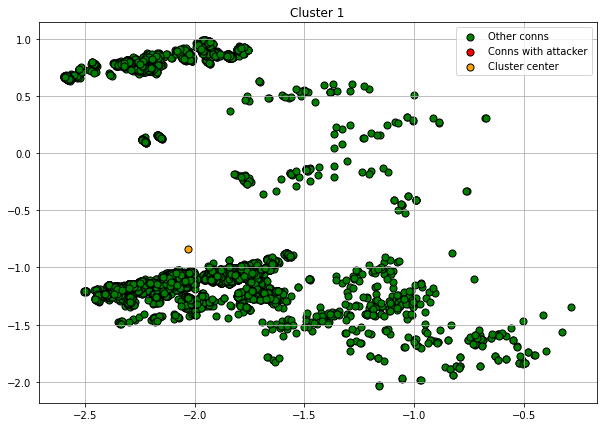

Total num of conns: 16537

Attacker conns ratio:
No    16537
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    3350
192.168.10.19    2431
192.168.10.9     2042
192.168.10.5     1886
192.168.10.14    1623
192.168.10.17    1476
192.168.10.12    1148
192.168.10.8      964
192.168.10.16     866
192.168.10.25     361
192.168.10.51     214
192.168.10.50     176
Name: originated_ip, dtype: int64

192.168.10.3     16453
192.168.10.19       84
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.052189Z
timestamp max = 2017-07-06T13:29:59.425165Z

Cluster 1 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
31838,CKUSIq3mFcGVjV8ov6,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T12:32:18.086713Z,0.03836,0.00023,0.00000,udp,dns,SF,0.91390,59892,orig_reg_or_dyn,0.00007,46,0.00001,2,0.00078,53,resp_53,0.00000,46,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17778,CRbaXXpS79SViueuf,1.00000,192.168.10.8,0.85747,192.168.10.3,2017-07-06T12:53:17.87898Z,0.38831,0.00128,0.00000,udp,dns,SF,0.75375,49397,orig_reg_or_dyn,0.00013,84,0.00001,2,0.00078,53,resp_53,0.00000,204,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
27146,CVaJbtEV3yRIA74Dg,1.00000,192.168.10.9,0.85747,192.168.10.3,2017-07-06T13:01:27.632165Z,0.52436,0.00020,0.00000,udp,dns,SF,0.87578,57394,orig_reg_or_dyn,0.00013,82,0.00001,2,0.00078,53,resp_53,0.00000,254,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17414,CnJJlA1EbKxJcK7b51,1.00000,192.168.10.5,0.85747,192.168.10.3,2017-07-06T12:54:38.925855Z,0.41083,0.00020,0.00000,udp,dns,SF,0.79883,52351,orig_reg_or_dyn,0.00009,56,0.00001,2,0.00078,53,resp_53,0.00000,88,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1688,CS9lyegZbPAqVHG91,1.00000,192.168.10.8,0.85747,192.168.10.3,2017-07-06T12:49:29.31375Z,0.32482,0.00016,0.00000,udp,dns,SF,0.78670,51556,orig_reg_or_dyn,0.00016,102,0.00001,2,0.00078,53,resp_53,0.00000,158,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11632,CFsoCn4qtchGRpgUW5,1.00000,192.168.10.14,0.85747,192.168.10.3,2017-07-06T13:04:24.895229Z,0.57360,0.00016,0.00000,udp,dns,SF,0.91500,59964,orig_reg_or_dyn,0.00011,70,0.00001,2,0.00078,53,resp_53,0.00000,102,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3544,CkQFRp3QVF6kxSW2Ii,1.00000,192.168.10.15,0.85747,192.168.10.3,2017-07-06T12:37:21.575947Z,0.12266,0.00021,0.00000,udp,dns,SF,0.89416,58598,orig_reg_or_dyn,0.00011,68,0.00001,2,0.00078,53,resp_53,0.00000,182,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
27098,CPhqGM3nM0swj92tg5,1.00000,192.168.10.12,0.85747,192.168.10.3,2017-07-06T12:55:44.271442Z,0.42898,0.03119,0.00002,udp,dns,SF,0.25985,17031,orig_reg_or_dyn,0.00012,74,0.00001,2,0.00078,53,resp_53,0.00000,154,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
14425,C1om9C4VcZzhn28vCj,1.00000,192.168.10.19,0.85747,192.168.10.3,2017-07-06T13:06:10.59534Z,0.60296,0.06110,0.00004,udp,dns,SF,0.84392,55306,orig_reg_or_dyn,0.00011,68,0.00001,2,0.00078,53,resp_53,0.00000,250,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
15764,CrQOlY19AwTdmpFHCl,1.00000,192.168.10.5,0.85747,192.168.10.3,2017-07-06T12:50:40.826851Z,0.34468,0.02393,0.00002,udp,dns,SF,0.97204,63702,orig_reg_or_dyn,0.00011,68,0.00001,2,0.00078,53,resp_53,0.00000,164,0.00001,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     16408
tcp       128
icmp        1
Name: protocol, dtype: int64

Service:
dns                   16190
ntp                     159
none                    100
krb                      38
gssapi,smb,krb           17
krb_tcp                  16
dce_rpc                   8
gssapi,dce_rpc,smb        5
gssapi,ntlm,smb           4
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    16301
orig_well_known      236
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            16094
resp_well_known      246
resp_123             159
resp_reg              34
resp_dyn               4
Name: resp_p_cat, dtype: int64




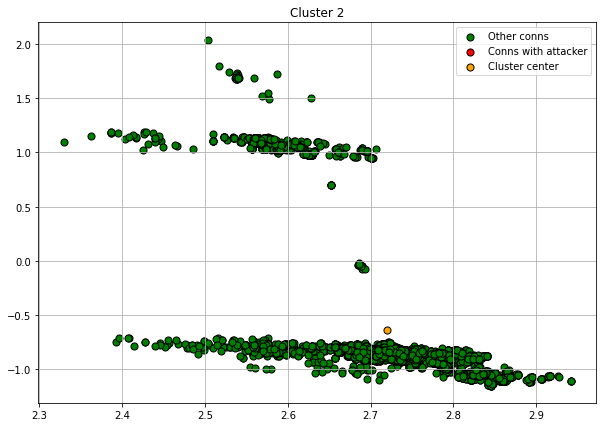

Total num of conns: 7746

Attacker conns ratio:
No    7746
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    1371
192.168.10.19     939
192.168.10.5      896
192.168.10.9      853
192.168.10.12     731
192.168.10.17     710
192.168.10.25     579
192.168.10.14     495
192.168.10.8      474
192.168.10.16     454
192.168.10.51     219
192.168.10.3       25
Name: originated_ip, dtype: int64

162.213.33.50      112
160.17.6.1          62
69.172.216.111      52
64.147.131.201      51
157.240.2.25        45
                  ... 
74.217.253.90        1
23.194.142.99        1
104.196.190.141      1
104.16.21.18         1
172.217.10.13        1
Name: responded_ip, Length: 2036, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.155795Z
timestamp max = 2017-07-06T13:29:59.873913Z

Cluster 2 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
32793,Cjisi433h3STPJxdii,1.00000,192.168.10.5,0.77238,173.241.242.143,2017-07-06T12:57:02.237105Z,0.45064,5.59620,0.00411,tcp,ssl,SF,0.77110,50534,orig_reg_or_dyn,0.00061,380,0.00006,9,0.00684,443,resp_443,0.00001,3625,0.00003,6,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
14487,CAwZjmDQggpVouf9c,1.00000,192.168.10.14,0.27250,64.4.54.254,2017-07-06T12:58:07.141059Z,0.46867,60.39099,0.04433,tcp,ssl,SF,0.91235,59790,orig_reg_or_dyn,0.00308,1922,0.00006,10,0.00684,443,resp_443,0.00001,4215,0.00004,8,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
13030,C2S8rb4xDtkTTX0QI2,1.00000,192.168.10.25,0.27505,64.147.131.160,2017-07-06T13:09:30.900474Z,0.65861,61.55202,0.04519,tcp,ssl,SF,0.75969,49786,orig_reg_or_dyn,0.00696,4343,0.00036,56,0.00684,443,resp_443,0.00022,138756,0.00055,98,0.00000,0.00000,0.00000,1.00000,0.03960,No,No
6531,CoJmzK27dBQGrZ9Trl,1.00000,192.168.10.25,0.76739,172.217.12.168,2017-07-06T12:53:46.822157Z,0.39635,41.11438,0.03018,tcp,ssl,SF,0.75670,49590,orig_reg_or_dyn,0.00137,857,0.00016,25,0.00684,443,resp_443,0.00003,20796,0.00012,21,0.00000,0.00000,0.00000,1.00000,0.02970,No,No
7340,Cy3Or03eEC5UwDV1bc,1.00000,192.168.10.15,0.92601,207.186.149.230,2017-07-06T12:39:28.104947Z,0.15781,5.46773,0.00401,tcp,ssl,SF,0.79594,52162,orig_reg_or_dyn,0.00074,461,0.00006,9,0.00684,443,resp_443,0.00001,3690,0.00006,10,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
22103,C6TRHy18JRyPBkEfie,1.00000,192.168.10.5,0.46836,107.22.140.69,2017-07-06T12:57:03.300004Z,0.45093,5.25499,0.00386,tcp,ssl,SF,0.77156,50564,orig_reg_or_dyn,0.00158,985,0.00006,10,0.00684,443,resp_443,0.00001,4275,0.00004,8,0.00000,0.00000,0.00000,1.00000,0.01980,No,No
9267,C5foNE1kIUFZjiEtdl,1.00000,192.168.10.19,0.21935,52.84.26.113,2017-07-06T12:53:12.537429Z,0.38683,115.87037,0.08506,tcp,ssl,SF,0.69431,45502,orig_reg_or_dyn,0.00172,1072,0.00013,21,0.00684,443,resp_443,0.00000,1084,0.00010,18,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
13852,CyOjyw3XQyWBaoviB3,1.00000,192.168.10.15,0.65887,148.251.48.245,2017-07-06T12:39:32.168392Z,0.15894,5.49512,0.00403,tcp,ssl,SF,0.79764,52273,orig_reg_or_dyn,0.00056,351,0.00006,9,0.00684,443,resp_443,0.00001,3656,0.00004,7,0.00000,0.00000,0.00000,1.00000,0.02970,No,No
39911,Cb1E8E3T5Lxj3H215c,1.00000,192.168.10.12,0.76739,172.217.7.4,2017-07-06T12:55:45.933246Z,0.42944,0.57101,0.00042,tcp,ssl,SF,0.50219,32912,orig_reg_or_dyn,0.00158,988,0.00012,18,0.00684,443,resp_443,0.00001,4241,0.00008,14,0.00000,0.00000,0.00000,1.00000,0.00000,No,No
17603,C7nwUkmMhSsboUa9a,1.00000,192.168.10.15,0.45589,104.88.14.9,2017-07-06T12:39:24.729134Z,0.15687,5.34378,0.00392,tcp,ssl,SF,0.79451,52068,orig_reg_or_dyn,0.00057,354,0.00006,9,0.00684,443,resp_443,0.00001,3713,0.00004,7,0.00000,0.00000,0.00000,1.00000,0.01980,No,No


Protocol:
tcp    7746
Name: protocol, dtype: int64

Service:
ssl     7709
none      37
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7746
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           7673
resp_well_known      71
resp_reg              2
Name: resp_p_cat, dtype: int64




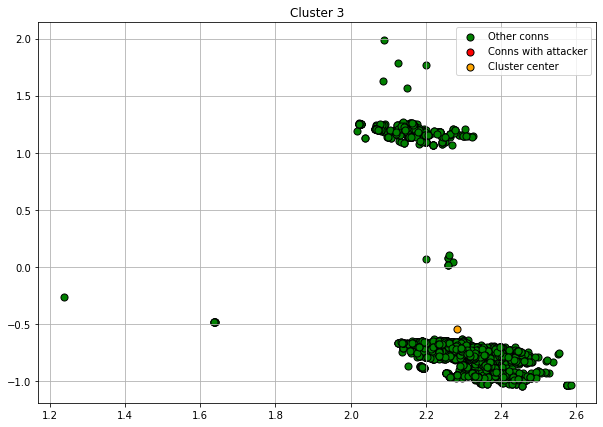

Total num of conns: 4622

Attacker conns ratio:
No    4622
Name: attacker_label, dtype: int64

IPs:
192.168.10.15    929
192.168.10.14    714
192.168.10.9     591
192.168.10.19    517
192.168.10.17    502
192.168.10.5     351
192.168.10.16    328
192.168.10.12    301
192.168.10.8     168
192.168.10.51    163
192.168.10.25     53
192.168.10.3       5
Name: originated_ip, dtype: int64

178.255.83.1       369
23.50.75.27        318
23.60.139.27       279
72.21.91.29        226
50.63.243.230      183
                  ... 
31.13.80.36          1
178.239.182.230      1
54.210.92.2          1
172.217.6.234        1
195.54.48.228        1
Name: responded_ip, Length: 825, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.011574Z
timestamp max = 2017-07-06T13:29:59.427338Z

Cluster 3 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
12752,CfFMkR2y7Ioq5GBbr8,1.00000,192.168.10.15,0.12260,31.13.80.12,2017-07-06T12:30:25.705405Z,0.00714,121.93402,0.08951,tcp,none,SF,0.77951,51085,orig_reg_or_dyn,0.00034,215,0.00006,10,0.00684,443,resp_443,0.00000,215,0.00004,7,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
33969,CwRiKi1DgddpDMORL7,1.00000,192.168.10.14,0.45468,104.20.16.243,2017-07-06T13:09:50.320402Z,0.66400,5.80699,0.00426,tcp,none,SF,0.91717,60106,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
21400,CDr34h2gBJaWpDR9Fc,1.00000,192.168.10.17,0.79536,178.255.83.1,2017-07-06T12:43:48.492076Z,0.23014,0.05447,0.00004,tcp,http,SF,0.91053,59671,orig_reg_or_dyn,0.00071,440,0.00003,5,0.00120,80,resp_80,0.00000,860,0.00003,5,0.00000,0.00000,1.00000,0.00000,0.01980,No,No
39969,ClgUsS1SlK5TnpvQsd,1.00000,192.168.10.5,0.76739,172.217.11.46,2017-07-06T13:29:10.950216Z,0.98641,3.30076,0.00242,tcp,http,RSTO,0.77550,50822,orig_reg_or_dyn,0.00347,2165,0.00008,13,0.00120,80,resp_80,0.00001,3730,0.00004,7,0.00000,0.00000,1.00000,0.00000,0.09901,No,No
33752,CnLuZr1V7thg7f9tj5,1.00000,192.168.10.15,0.82466,185.113.25.60,2017-07-06T12:37:22.050961Z,0.12279,5.21629,0.00383,tcp,http,SF,0.79196,51901,orig_reg_or_dyn,0.00061,378,0.00004,6,0.00120,80,resp_80,0.00000,2353,0.00003,5,0.00000,0.00000,1.00000,0.00000,0.00990,No,No
27626,Csloms2X854CbeBsza,1.00000,192.168.10.19,0.08960,23.203.96.169,2017-07-06T12:37:44.655353Z,0.12907,115.93610,0.08511,tcp,http,SF,0.73783,48354,orig_reg_or_dyn,0.00060,376,0.00011,17,0.00120,80,resp_80,0.00000,361,0.00008,15,0.00000,0.00000,1.00000,0.00000,0.00990,No,No
15682,CoTP1x1BvAdg9z5ovf,1.00000,192.168.10.9,0.86536,194.100.98.72,2017-07-06T12:30:01.243447Z,0.00034,0.13107,0.00010,tcp,none,SF,0.01990,1307,orig_reg_or_dyn,0.00000,0,0.00001,2,0.00120,80,resp_80,0.00000,531,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
14258,Ch5wbpBZHjhy0rEh4,1.00000,192.168.10.14,0.08688,23.50.75.27,2017-07-06T13:20:39.690018Z,0.84439,5.10782,0.00375,tcp,none,SF,0.92568,60664,orig_reg_or_dyn,0.00000,0,0.00003,4,0.00120,80,resp_80,0.00000,0,0.00001,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
37212,CnWTg94YY6rgleR1O3,1.00000,192.168.10.14,0.23068,54.209.235.232,2017-07-06T13:19:50.060389Z,0.83060,115.76812,0.08499,tcp,http,SF,0.92153,60392,orig_reg_or_dyn,0.00057,357,0.00012,18,0.00120,80,resp_80,0.00000,1684,0.00009,16,0.00000,0.00000,1.00000,0.00000,0.00990,No,No
13658,CBlgFP2HAmpVrDseG8,1.00000,192.168.10.5,0.08706,23.60.139.27,2017-07-06T13:02:16.186382Z,0.53785,115.78290,0.08500,tcp,http,SF,0.77460,50763,orig_reg_or_dyn,0.00069,430,0.00011,17,0.00120,80,resp_80,0.00000,1770,0.00008,15,0.00000,0.00000,1.00000,0.00000,0.01980,No,No


Protocol:
tcp    4621
udp       1
Name: protocol, dtype: int64

Service:
http        2977
none        1600
ftp-data      44
ftp            1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4622
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80     4238
resp_443     337
resp_reg      40
resp_dyn       6
resp_21        1
Name: resp_p_cat, dtype: int64




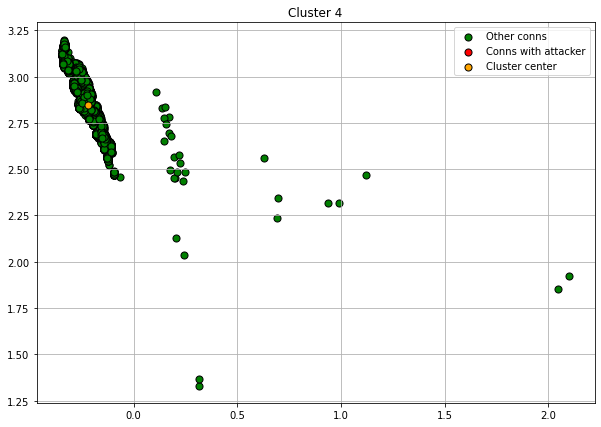

Total num of conns: 8320

Attacker conns ratio:
No    8320
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     8316
192.168.10.50       2
192.168.10.19       2
Name: originated_ip, dtype: int64

192.168.10.1      8290
192.168.10.255      21
224.0.0.251          4
224.0.0.252          2
224.0.1.24           1
131.253.34.255       1
65.52.108.189        1
Name: responded_ip, dtype: int64

Time:
timestamp min = 2017-07-06T12:30:00.119093Z
timestamp max = 2017-07-06T13:29:59.41753Z

Cluster 4 OK sample connections:


,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
40394,CBiAzA1J9kFqcFdGQd,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:39:37.708735Z,0.16048,0.04884,0.00004,udp,dns,SF,0.94154,61703,orig_reg_or_dyn,0.00008,51,0.00001,1,0.00078,53,resp_53,0.00000,112,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
6660,C5pND31xR6YVLrVdC7,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T13:27:50.175274Z,0.96397,0.00077,0.00000,udp,dns,SF,0.92777,60801,orig_reg_or_dyn,0.00007,44,0.00001,1,0.00078,53,resp_53,0.00000,60,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
31494,Cr7ggx7t7hDBb12T8,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:50:15.828543Z,0.33774,0.02327,0.00002,udp,dns,SF,0.91969,60271,orig_reg_or_dyn,0.00009,58,0.00001,1,0.00078,53,resp_53,0.00000,74,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
36103,CmoVuaIGtMcz9cozb,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:47:31.132387Z,0.29199,0.25856,0.00019,udp,dns,SF,0.93963,61578,orig_reg_or_dyn,0.00007,43,0.00001,1,0.00078,53,resp_53,0.00000,133,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
22225,CWCJipSx1EVW64uC8,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:50:16.298548Z,0.33787,0.02337,0.00002,udp,dns,SF,0.93957,61574,orig_reg_or_dyn,0.00011,71,0.00001,1,0.00078,53,resp_53,0.00000,150,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
32060,CRH6k6116WYrGBbnka,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:39:27.899982Z,0.15775,0.02371,0.00002,udp,dns,SF,0.94398,61863,orig_reg_or_dyn,0.00007,44,0.00001,1,0.00078,53,resp_53,0.00000,118,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
34164,CCUAdw3W8pw7fBnOK3,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:43:48.195148Z,0.23006,0.02385,0.00002,udp,dns,SF,0.93873,61519,orig_reg_or_dyn,0.00007,42,0.00001,1,0.00078,53,resp_53,0.00000,105,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
40387,C8HA3e245juwTR2CMa,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:55:34.467934Z,0.42625,0.03100,0.00002,udp,dns,SF,0.95092,62318,orig_reg_or_dyn,0.00012,74,0.00001,1,0.00078,53,resp_53,0.00000,202,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
32797,CBvHz44ypUUkWs6J12,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T12:39:48.589182Z,0.16350,0.03088,0.00002,udp,dns,SF,0.94418,61876,orig_reg_or_dyn,0.00010,64,0.00001,1,0.00078,53,resp_53,0.00000,117,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
37425,CULDoSsDUsPGaz8Mj,1.00000,192.168.10.3,0.85747,192.168.10.1,2017-07-06T13:27:32.159166Z,0.95897,0.06674,0.00005,udp,dns,SF,0.93550,61307,orig_reg_or_dyn,0.00008,47,0.00001,1,0.00078,53,resp_53,0.00000,175,0.00001,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    8318
tcp       2
Name: protocol, dtype: int64

Service:
dns     8312
none       8
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8298
orig_well_known      22
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8290
resp_well_known      22
resp_reg              6
resp_443              2
Name: resp_p_cat, dtype: int64




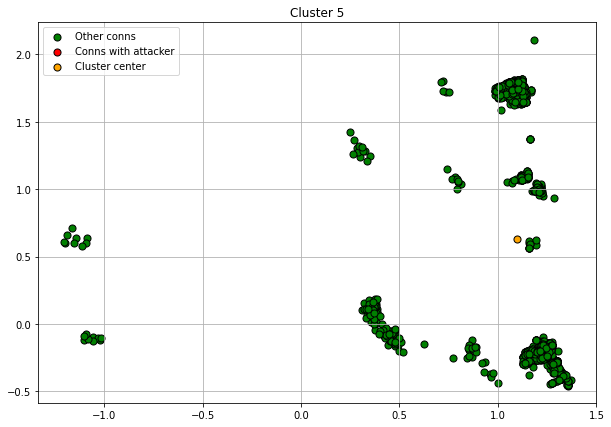

Total num of conns: 1743

Attacker conns ratio:
No    1743
Name: attacker_label, dtype: int64

IPs:
192.168.10.19    654
192.168.10.17    586
192.168.10.50    159
192.168.10.12    143
192.168.10.16    100
192.168.10.25     95
192.168.10.51      2
192.168.10.14      1
192.168.10.5       1
192.168.10.15      1
192.168.10.3       1
Name: originated_ip, dtype: int64

192.168.10.255     120
167.114.204.238     89
159.203.8.72        89
91.189.89.199       88
144.217.148.73      88
91.189.91.157       66
91.189.89.198       65
206.108.0.132       64
129.128.12.20       63
72.38.129.202       56
17.253.14.253       55
67.215.197.149      54
158.69.247.184      35
192.99.2.8          34
192.95.27.155       34
75.119.251.14       34
163.172.10.212      34
144.217.109.67      34
213.109.127.82      33
5.9.74.228          33
195.186.4.101       33
198.100.147.178     31
108.61.73.244       31
158.69.125.231      31
206.108.0.131       30
199.182.221.110     30
99.224.25.39        30
206.108.0.133

,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
28706,CuyhEy43S2thOuBNt2,1.00000,192.168.10.12,0.74284,167.114.204.238,2017-07-06T12:49:52.01545Z,0.33112,0.01638,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
11863,CtcYyV1cub5ARktRPb,1.00000,192.168.10.17,0.64008,144.217.148.73,2017-07-06T13:18:58.035683Z,0.81615,0.01630,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
22951,CM1cmWSXiIs84xSbb,1.00000,192.168.10.17,0.91949,206.75.89.101,2017-07-06T12:58:09.035303Z,0.46919,0.09299,0.00007,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
419,Cl2ajp3Eu7KaUbBbj9,1.00000,192.168.10.12,0.39857,91.189.89.199,2017-07-06T12:32:53.014738Z,0.04806,0.09384,0.00007,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
17819,Cfkk1u2hU3Dw7saH7k,1.00000,192.168.10.50,0.47360,108.61.73.244,2017-07-06T12:59:51.448613Z,0.49764,0.02370,0.00002,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
368,CkHwIt9TFrJrebsef,1.00000,192.168.10.19,0.30949,72.38.129.202,2017-07-06T13:27:11.271465Z,0.95316,0.03797,0.00003,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
15163,CP5IZ03n2MtNCj4XS7,1.00000,192.168.10.19,0.95192,213.109.127.82,2017-07-06T13:28:19.271518Z,0.97205,0.10941,0.00008,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
6641,CBGw8N3U5p1YQHKrTg,1.00000,192.168.10.17,0.64009,144.217.252.208,2017-07-06T12:37:41.032815Z,0.12807,0.01648,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
22794,C2Rvxa4cEYY29xpf39,1.00000,192.168.10.12,0.64008,144.217.148.73,2017-07-06T13:17:02.015971Z,0.78392,0.01591,0.00001,udp,ntp,SF,0.00183,123,orig_well_known,0.00008,48,0.00001,1,0.00186,123,resp_123,0.00000,48,0.00001,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
5674,C3z8zJ7ko4bJKMFK4,1.00000,192.168.10.25,0.85747,192.168.10.255,2017-07-06T13:05:35.817665Z,0.59330,0.00002,0.00000,udp,dns,S0,0.00204,137,orig_well_known,0.00104,650,0.00008,13,0.00208,137,resp_well_known,0.00000,0,0.00000,0,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    1743
Name: protocol, dtype: int64

Service:
ntp     1612
dns       92
none      39
Name: service, dtype: int64

Orig_p_cat:
orig_well_known    1713
orig_reg_or_dyn      30
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_123           1612
resp_well_known     121
resp_reg             10
Name: resp_p_cat, dtype: int64




In [92]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.scatter(
        kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='Cluster center'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')
    
    print('Time:')
    print_df_func(result_cluster, 'timestamp', 'min')
    print_df_func(result_cluster, 'timestamp', 'max')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS, axis=1)
        display(samples)
    
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Evaluation

**Rand index** *can't be used, requires labels.. (https://scikit-learn.org/stable/modules/clustering.html#rand-index)*


Notation: set `S = {1, 2, .. n}` of `x > 2` points, distance function `d(i,j)` measures distance between 2 points from S (d can be Euclidean, Manhattan, Chebyshev, Mahalanobis, .. alternatively similarity function can be used)


#### 3 axioms of Jon Kleinberg: 

- characteristics that a grouping problem shuld exhibit and can be considered "good", independently of alg used to find solution

1. **scale invariance**: `f(d) == f(alfa*d)` for any d and alfa > 0

2. **consistency**: if for every (i,j) from same cluster `d(i,j) >= d'(i,j)` and from different clusters `d(i,j) < d'(i,j)` then `f(d) == f(d')`

3. **wealth, richness**: every partition of S is a possible result of the clustering process

For every n >= 2 there is no clustering alg. that satysfies all three at once. 

2 measure of internal metrics: 

**cohesion** = between points in same cluster

**separation** = between points from different clusters



### Sum of Squared Error (SSE) 

(https://stackoverflow.com/questions/43784903/scikit-k-means-clustering-performance-measure)

Elbow Criterion 

- not available as a function in Scikit (we need to calculate SSE to evaluate K-Means using Elbow Criterion)

**Idea of Elbow Criterion method: choose `k` (number of cluster) at which the SSE decreases abruptly.**

(Small values indicate good quality.)

SSE = sum of squared distance between each member of the cluster and its centroid

SSE tends to decrease toward 0 as we increase k (SSE=0, when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

=> goal: choose a small value of k that still has a low SSE, and the elbow usually represents, where we start to have diminishing returns by increasing k

If the line graph looks like an arm, the "elbow" on the arm is the value of optimal k (number of cluster). 

## Metrics that quantify level of separation and cohesion in a single measure:

### Silhouette Score

- used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other
- is calculated for each sample of different clusters
- to calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters: Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a. Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

Silhouette score, S, for each sample is calculated using the following formula:

```
Silhouette Score = (average intra-cluster distance - average inter-cluster distance) / 
                   max(average inter-cluster distance, average intra-cluster distance)

```

- intra-cluster distance = average distance between each point within a cluster
- inter-cluster distance = average distance between all clusters

Value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.

Single pass eval:

In [40]:
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics

sse = {}
sil = {}
ch = {}
db = {}

from sklearn.cluster import KMeans
from sklearn import metrics

for k in range(2, len(computed_clusters)):
# for k in range(OPTIMAL_K, OPTIMAL_K + 1):
    print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    km = computed_clusters[k]
    km_fit = computed_clusters_fitted[k]
    
    print('K=' + str(k + 1) + ' clusters: ')
    
    sse_score = km_fit.inertia_   
    sse[k] = sse_score
    print('Sum of Squared Error for k = ' + str(k + 1) + ': ' + str(sse_score))
    
    ch_score = metrics.calinski_harabasz_score(pca_X, km_fit.labels_)
    ch[k] = ch_score
    print('Calisnki-Harabasz Coefficient for k = ' + str(k + 1) + ': ' + str(ch_score))
    
    db_score = davies_bouldin_score(pca_X, km_fit.labels_)
    db[k] = db_score
    print('Davies-Bouldin Index for k = ' + str(k + 1) + ': ' + str(db_score))
    
    sil_score = metrics.silhouette_score(pca_X, km.labels_, metric='euclidean')
    sil[k] = sil_score
    print('Silhouette Score for k = ' + str(k + 1) + ': ' + str(sil_score))
    
    print('End at ' + datetime.now().strftime("%H:%M:%S") + '.')
    
    print('--')

Start at 00:23:32.
K=3 clusters: 
Sum of Squared Error for k = 3: 176598.2471782128
Calisnki-Harabasz Coefficient for k = 3: 34692.96171780993
Davies-Bouldin Index for k = 3: 0.8957616656229762
Silhouette Score for k = 3: 0.5055568389521109
End at 00:23:56.
--
Start at 00:23:56.
K=4 clusters: 
Sum of Squared Error for k = 4: 153539.27961435978
Calisnki-Harabasz Coefficient for k = 4: 31928.748815465584
Davies-Bouldin Index for k = 4: 0.8409428655490918
Silhouette Score for k = 4: 0.5338730951110798
End at 00:24:18.
--
Start at 00:24:18.
K=5 clusters: 
Sum of Squared Error for k = 5: 131367.8108347284
Calisnki-Harabasz Coefficient for k = 5: 32036.260195117262
Davies-Bouldin Index for k = 5: 0.9817003601298688
Silhouette Score for k = 5: 0.5287627795246873
End at 00:24:41.
--
Start at 00:24:41.
K=6 clusters: 
Sum of Squared Error for k = 6: 114803.82889963344
Calisnki-Harabasz Coefficient for k = 6: 30163.22168132545
Davies-Bouldin Index for k = 6: 0.9235061696965924
Silhouette Score fo

In [41]:
sse

{2: 176598.2471782128,
 3: 153539.27961435978,
 4: 131367.8108347284,
 5: 114803.82889963344,
 6: 98995.76580159228,
 7: 91384.14960007409,
 8: 88482.70917564337,
 9: 85564.2052227255,
 10: 79627.77276460685,
 11: 75719.92647965139,
 12: 71552.08681823747,
 13: 70533.99658415707,
 14: 67428.98944656693,
 15: 66745.13729443327,
 16: 65349.11122107779,
 17: 62429.90900664609,
 18: 60304.02483219678,
 19: 59641.57023284167,
 20: 58709.163016648214,
 21: 57220.151738381246,
 22: 56437.150773844005,
 23: 53481.822723926314}

In [42]:
ch

{2: 34692.96171780993,
 3: 31928.748815465584,
 4: 32036.260195117262,
 5: 30163.22168132545,
 6: 29139.39034396584,
 7: 28266.988394819833,
 8: 25956.57340898762,
 9: 23966.502942348532,
 10: 23221.480873203567,
 11: 22362.616828333827,
 12: 20826.702533318436,
 13: 19525.892749179315,
 14: 19738.762644546012,
 15: 18631.067670241413,
 16: 17889.85014093354,
 17: 17955.57937130532,
 18: 17741.67067915348,
 19: 17013.523374131273,
 20: 16446.539581938654,
 21: 16110.019090135918,
 22: 15553.871362538002,
 23: 15905.945456732445}

In [43]:
db

{2: 0.8957616656229762,
 3: 0.8409428655490918,
 4: 0.9817003601298688,
 5: 0.9235061696965924,
 6: 0.9662808774183943,
 7: 0.9650825740133294,
 8: 0.9841343907841149,
 9: 1.134026256268227,
 10: 1.1081315389089066,
 11: 1.1156193723242944,
 12: 1.2601627900431014,
 13: 1.3333653991489804,
 14: 1.3225161137811727,
 15: 1.3554287328263865,
 16: 1.3356522701415,
 17: 1.3304445360574078,
 18: 1.4023243522205933,
 19: 1.5012261937054525,
 20: 1.4834244898675408,
 21: 1.3086000257711774,
 22: 1.4126075642635738,
 23: 1.3865096630650964}

In [44]:
sil

{2: 0.5055568389521109,
 3: 0.5338730951110798,
 4: 0.5287627795246873,
 5: 0.5443115566342028,
 6: 0.488399025720879,
 7: 0.4975100147276127,
 8: 0.37683318103163427,
 9: 0.36810169022558725,
 10: 0.40205339852831223,
 11: 0.40652884991459215,
 12: 0.3323167471364723,
 13: 0.33250062988001583,
 14: 0.33986146050680743,
 15: 0.3221731376895848,
 16: 0.32104725529944794,
 17: 0.3223363254010383,
 18: 0.32880182360489624,
 19: 0.32471555178716316,
 20: 0.3140706408889064,
 21: 0.3202251929176923,
 22: 0.32042886180307206,
 23: 0.32025322542812407}

In [45]:
# 1: clusters are clearly distinguished
# 0: distance between clusters is not significant ('data are uniformly distributed throughout Euclidean space')
# -1: clusters are assigned the wrong way

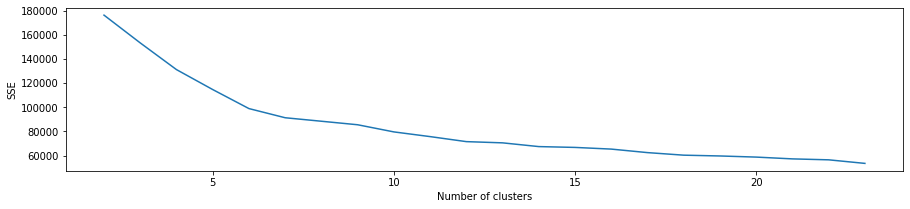

In [69]:
# import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()

In [70]:
# plt.rcParams["figure.figsize"] = (15,3)
# plt.figure()
# sse_to_10 = { k: v for k, v in sse.items() if k <= 10 }  # zoom in
# plt.plot(list(sse_to_10.keys()), list(sse_to_10.values()))
# plt.xlabel("Number of clusters")
# plt.ylabel("SSE")
# plt.show()

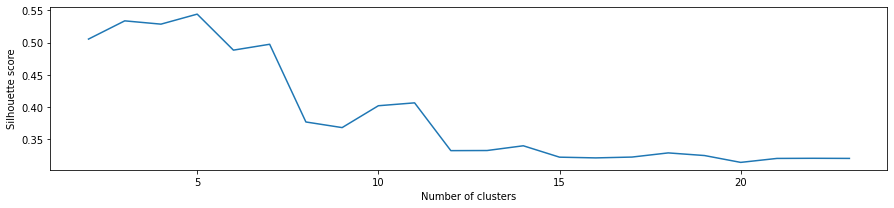

In [71]:
plt.rcParams["figure.figsize"] = (15,3)
plt.figure()
plt.plot(list(sil.keys()), list(sil.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()

## Interpretation

Parallel coordinates plots.

In [93]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

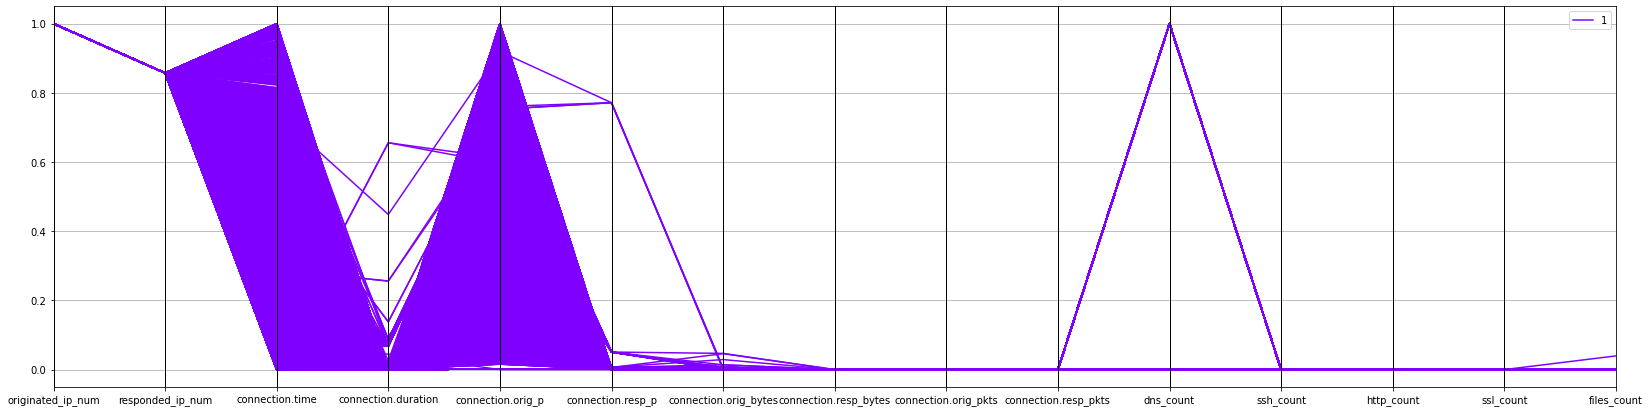

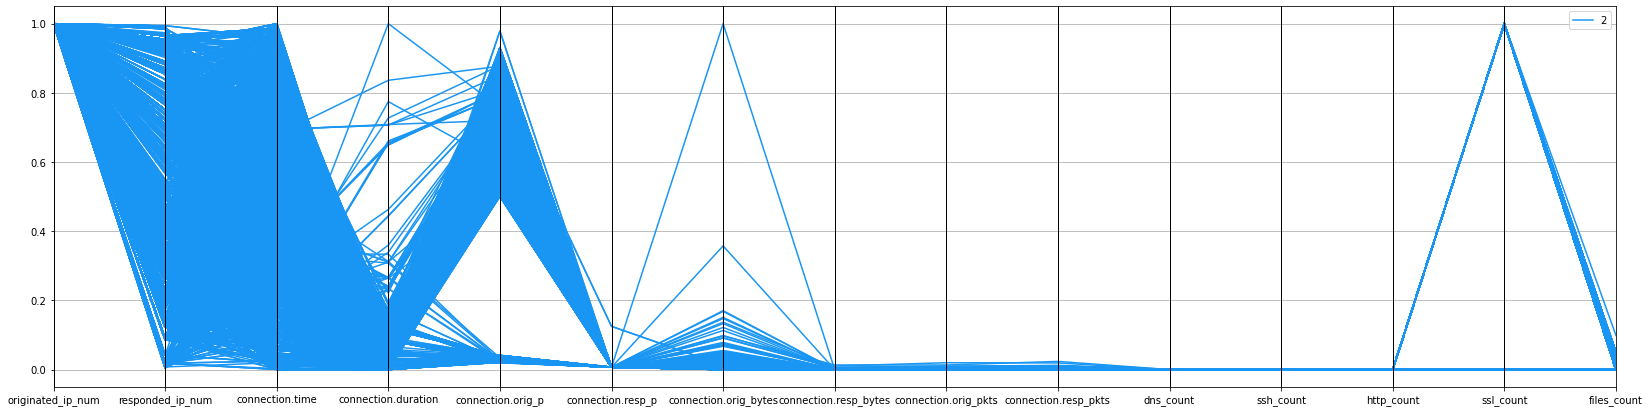

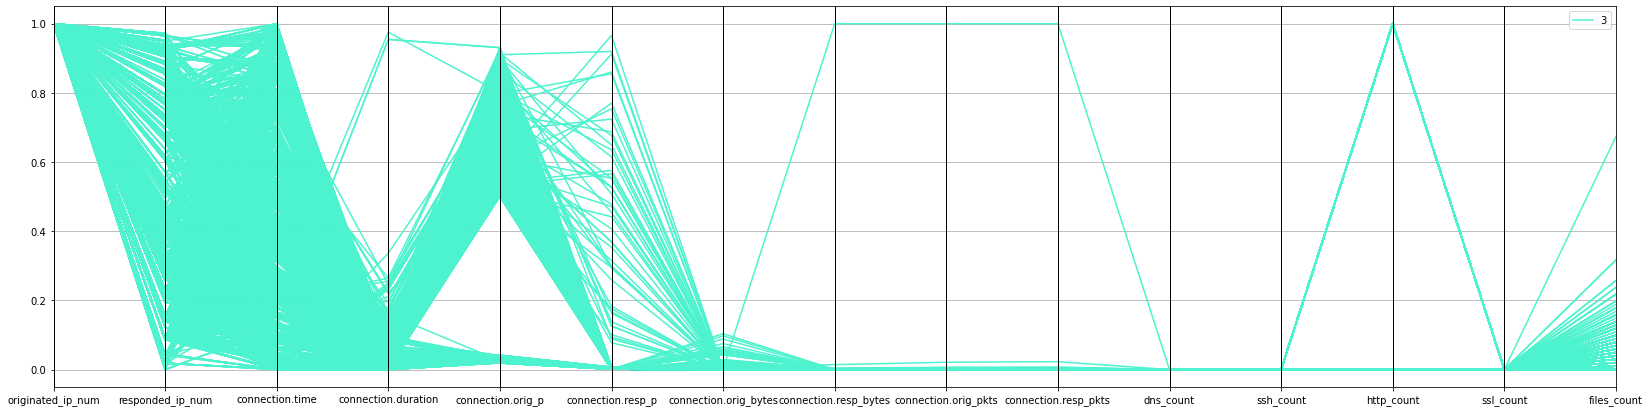

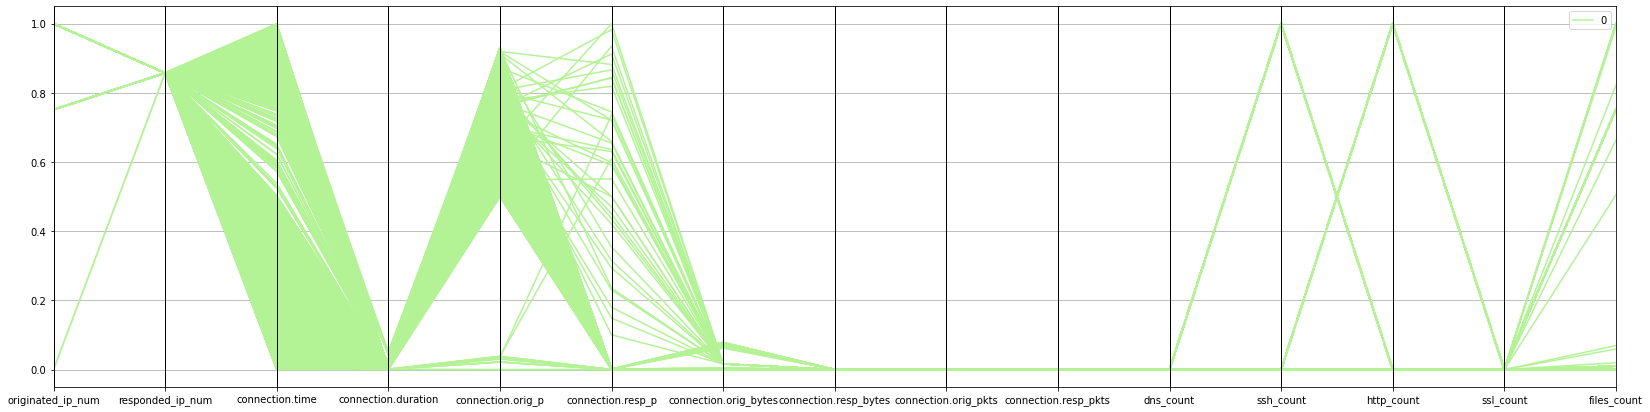

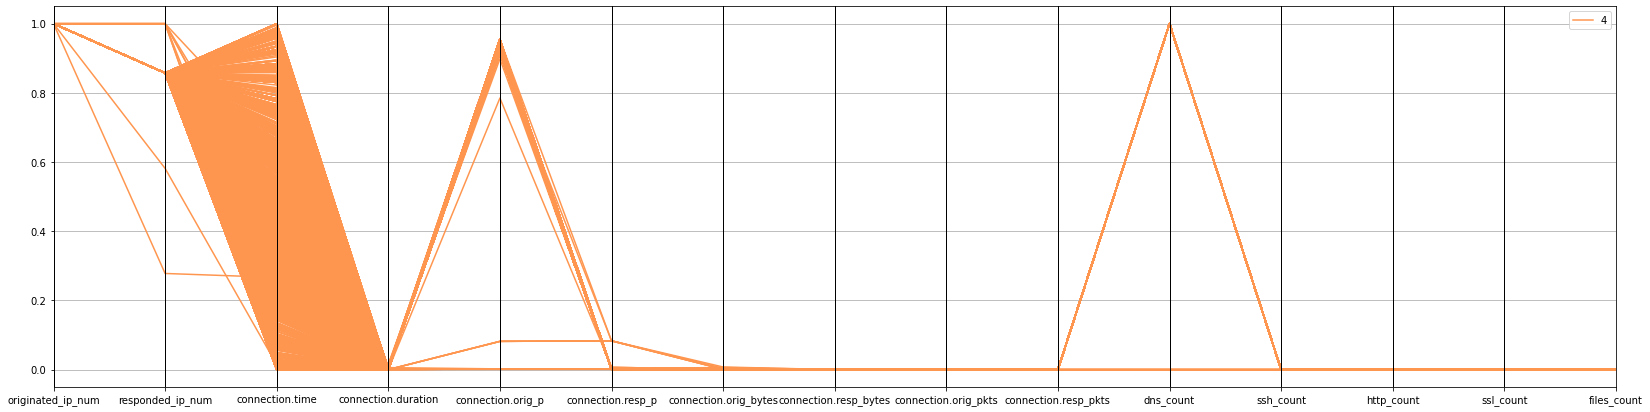

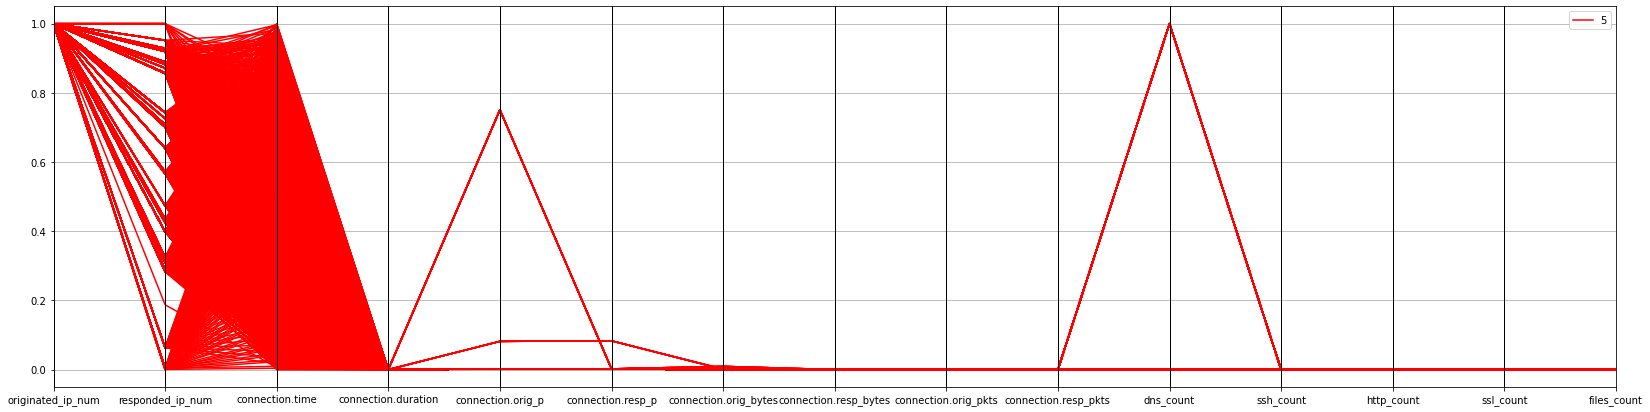

In [94]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

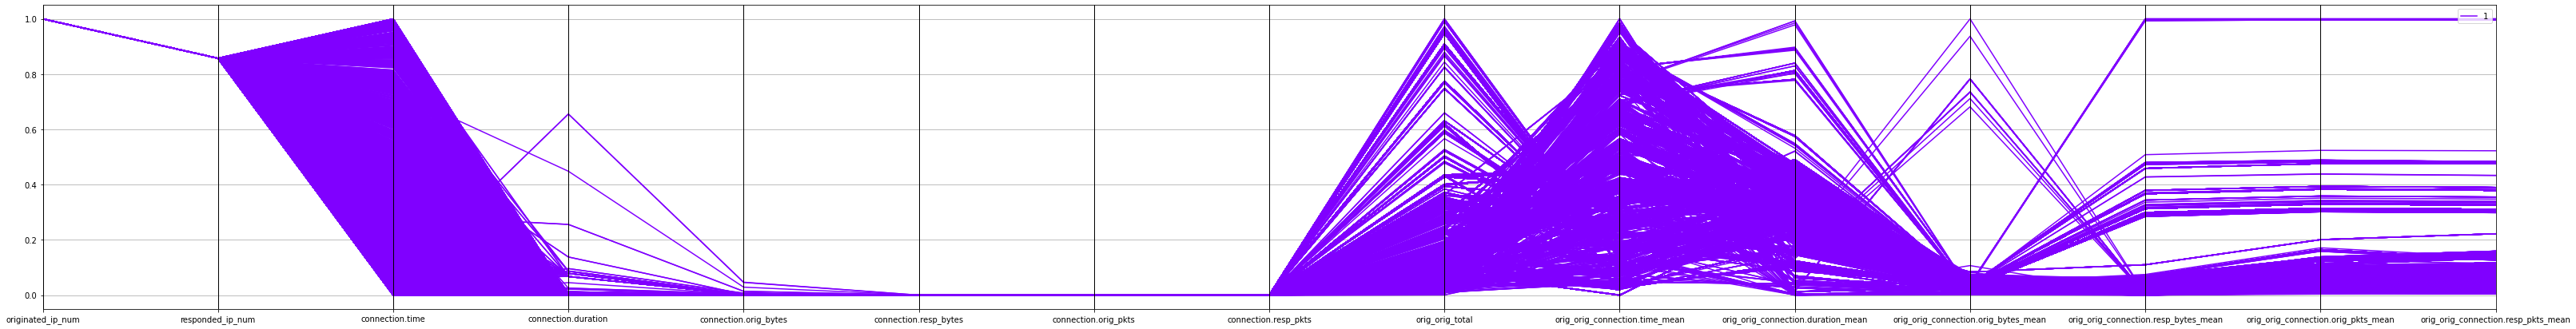

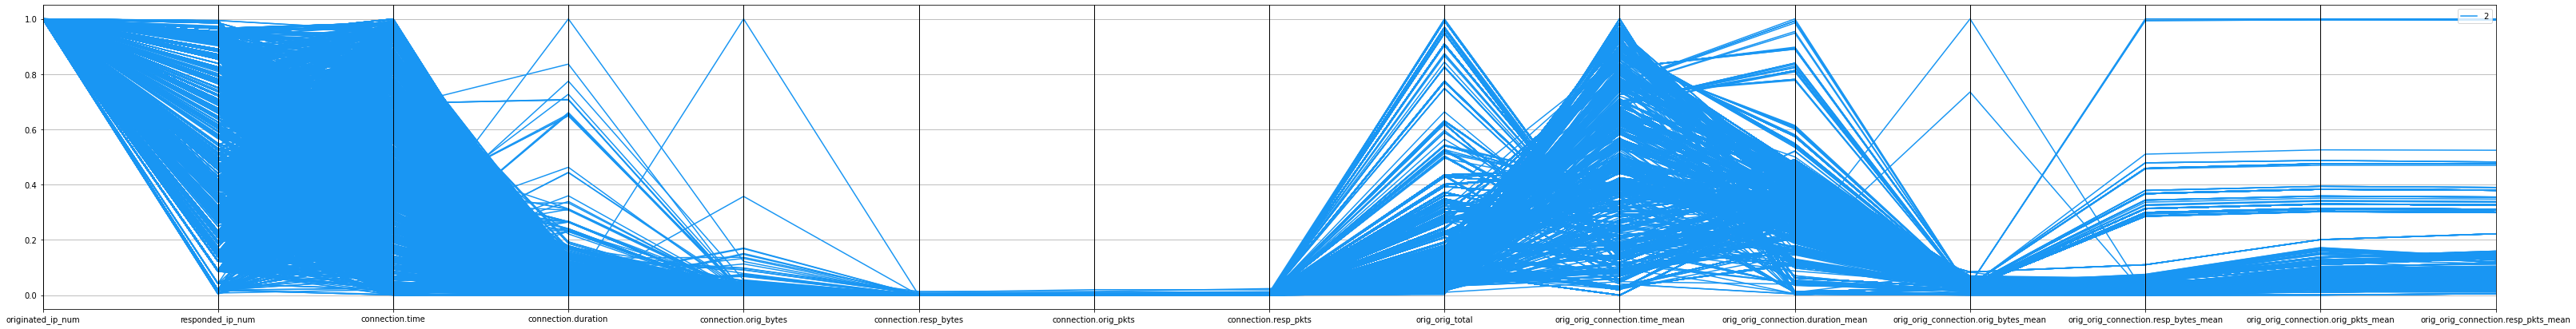

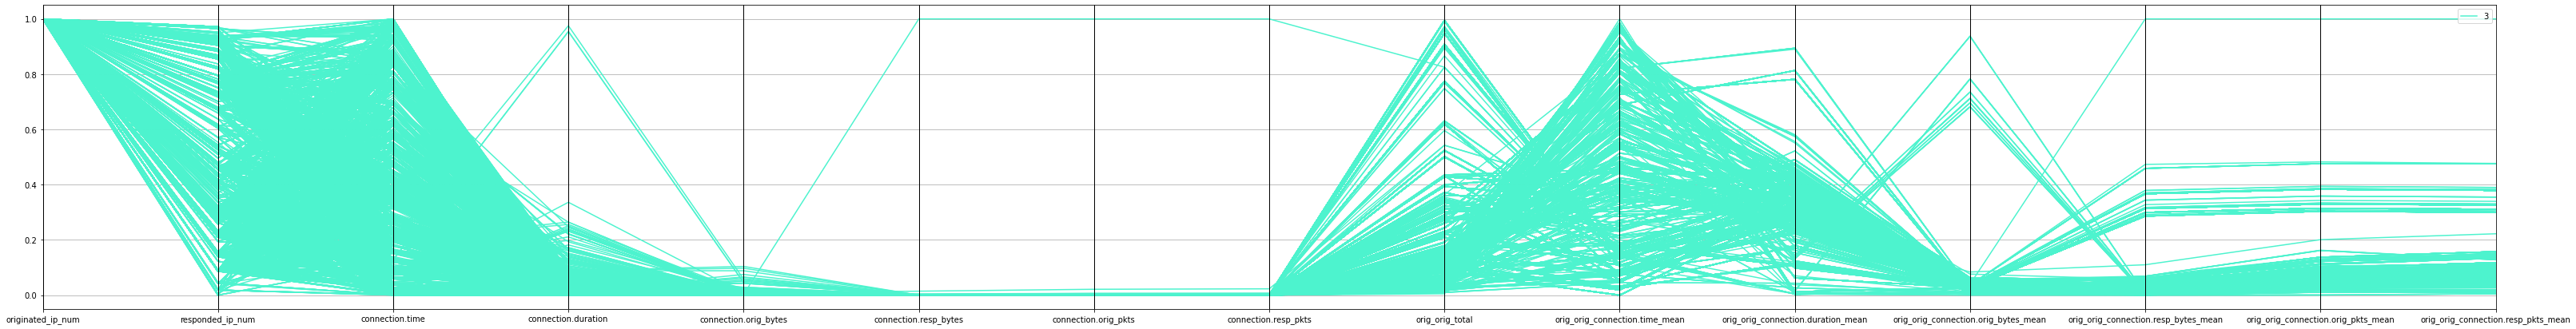

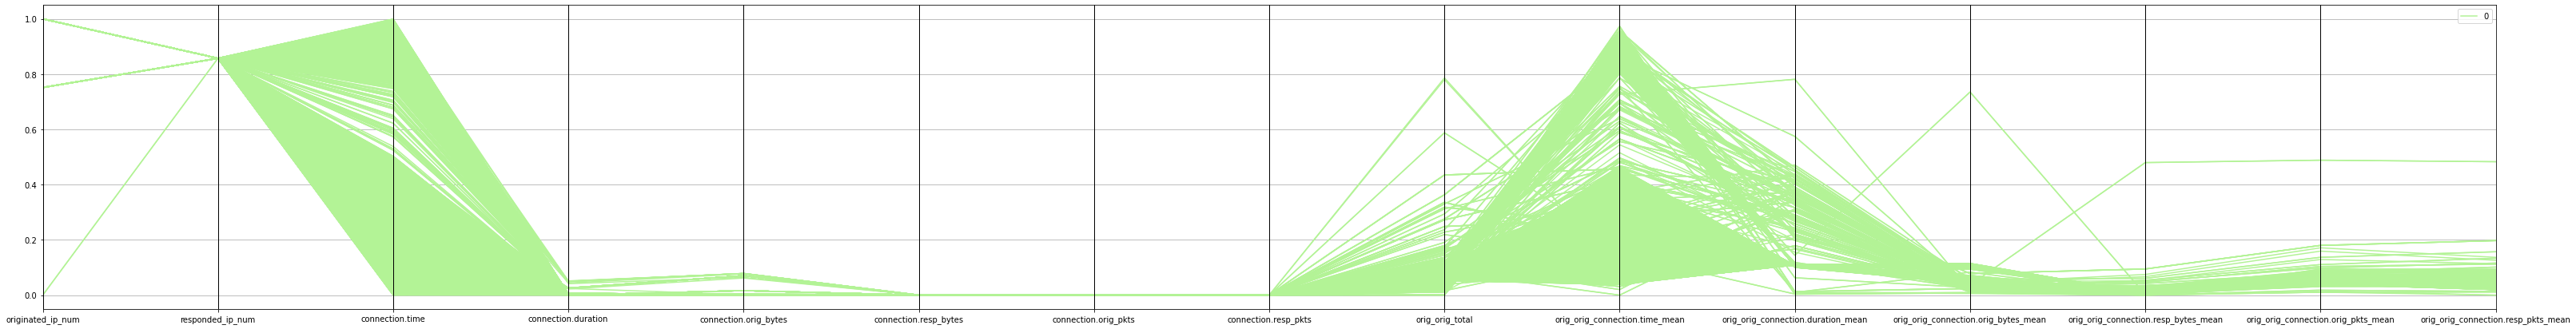

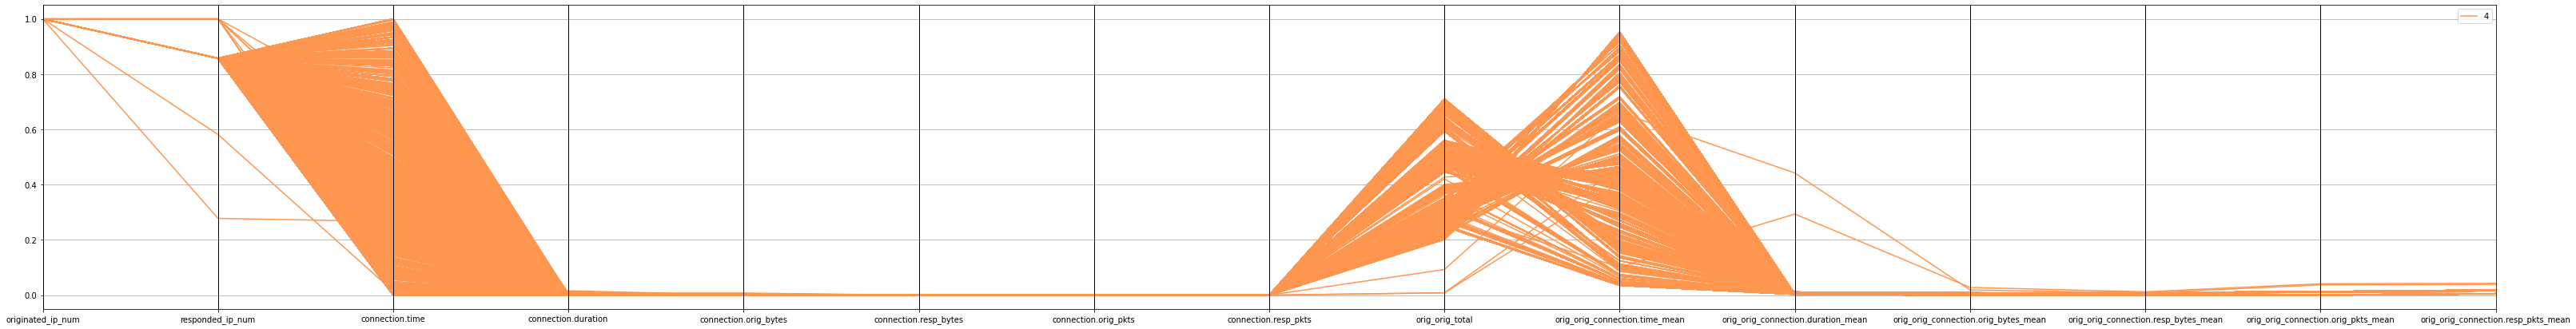

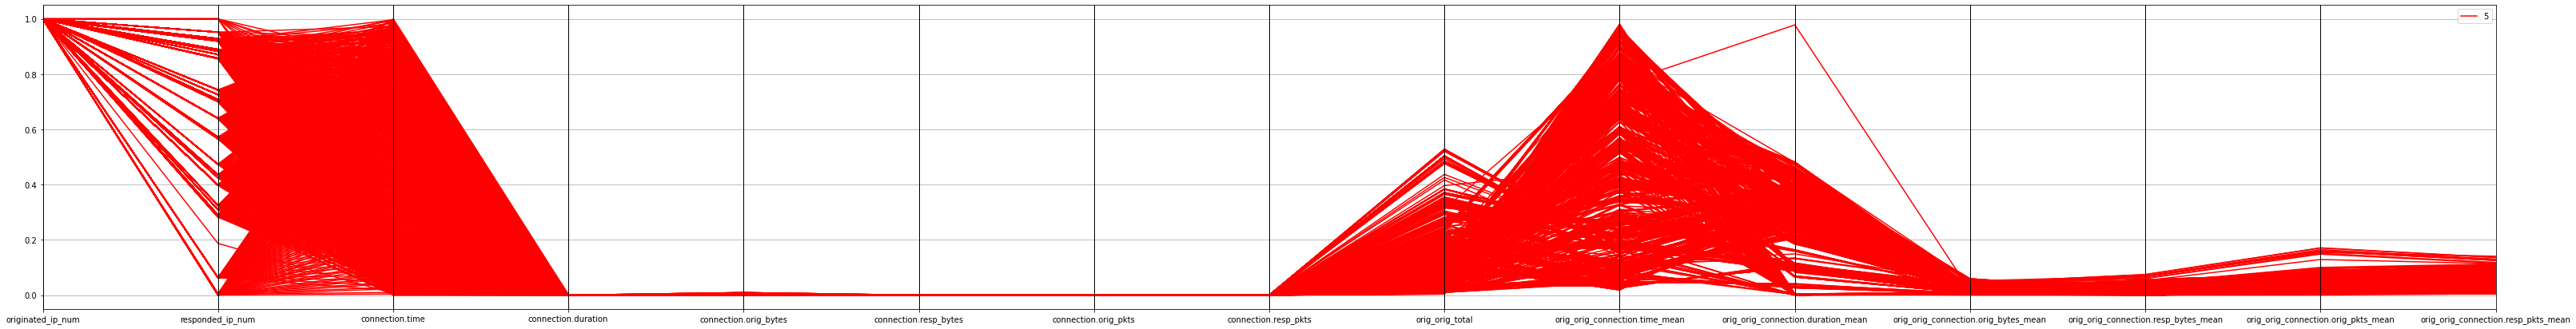

In [98]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()